### Revenue Leakage Analysis in Subscription Based Models

##### Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading the Dataset

In [3]:
df = pd.read_csv("transactions.csv")
df.head()

,user_id,plan_type,start_date,end_date,monthly_fee,actual_usage,billed_amount,discount,status
0,fe794379-7b09-4893-a0d2-a71a49e9a6ca,Premium,2025-07-15,NaN,2000,1,1195,479.00,active
1,fa25789d-941c-4402-8d85-b557c37414f9,Basic,2025-06-21,NaN,800,1,800,213.00,active
2,dc9cf68c-0f5e-49c6-9fe2-e31c8aa5c559,Premium,2024-12-08,NaN,2000,8,16000,0.00,active
3,ecd53f76-8bda-4835-bd05-86c50d0b2aea,Basic,2024-09-15,NaN,800,11,8800,0.00,active
4,e2e7328b-4adf-4659-9171-f816dfae6adc,Basic,2025-06-02,NaN,800,2,1600,267.71,active


In [4]:
# Summary of Dataset
df.describe()

,monthly_fee,actual_usage,billed_amount,discount
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,1348.640000,5.854000,6603.011600,157.035034
std,501.043271,3.413534,5719.618645,542.900587
min,800.000000,1.000000,0.000000,0.000000
25%,800.000000,3.000000,2000.000000,0.000000
50%,1200.000000,6.000000,5600.000000,0.000000
75%,2000.000000,9.000000,9600.000000,0.000000
max,2000.000000,12.000000,24000.000000,6742.380000


##### Performing KPI Analysis

1. Expected Revenue

In [5]:
df['expected_revenue'] = df['monthly_fee'] * df['actual_usage']
print(df['expected_revenue'])

0        2000
1         800
2       16000
3        8800
4        1600
        ...  
4995    18000
4996     8000
4997     7200
4998     3600
4999     2000
Name: expected_revenue, Length: 5000, dtype: int64


2. Revenue Leakage

In [6]:
df['revenue_leakage'] = df['expected_revenue'] - df['billed_amount']
print(df['revenue_leakage'])

0        805
1          0
2          0
3          0
4          0
        ... 
4995       0
4996    2706
4997       0
4998       0
4999       0
Name: revenue_leakage, Length: 5000, dtype: int64


3. Billing Efficiency

In [7]:
df['billing_efficiency'] = df['billed_amount'] / df['expected_revenue']
df['billing_efficiency'] = df['billing_efficiency'].replace([float('inf'), -float('inf')], 0).fillna(0)
print(df['billing_efficiency'])

0       0.59750
1       1.00000
2       1.00000
3       1.00000
4       1.00000
         ...   
4995    1.00000
4996    0.66175
4997    1.00000
4998    1.00000
4999    1.00000
Name: billing_efficiency, Length: 5000, dtype: float64


4. Churn Rate

In [8]:
churn_rate = (df['status'] == 'churned').sum() / len(df)
print(churn_rate)

0.0798


5. Discount Metrics

In [17]:
if 'discount' in df.columns:
    #Count of Customers availing a Discount
    discount_count = (df['discount'] > 0).sum()
    

    #Discount Leakage
    df['discount_leakage'] = (df['discount'] / df['expected_revenue'])
    df['discount_leakage'] = df['discount_leakage'].replace([float('inf'), -float('inf')], 0).fillna(0)

    #Total Discount Leakage Amount
    total_discount_amount = df['discount'].sum()

else:
    discount_count = None
    total_discount_amount = None    

Visual 1: Revenue Overview (Expected vs Billed vs Leakage)

C:\Users\aarav\AppData\Local\Temp\ipykernel_20832\1616571059.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(revenue_data.keys()), y=list(revenue_data.values()), palette='viridis')


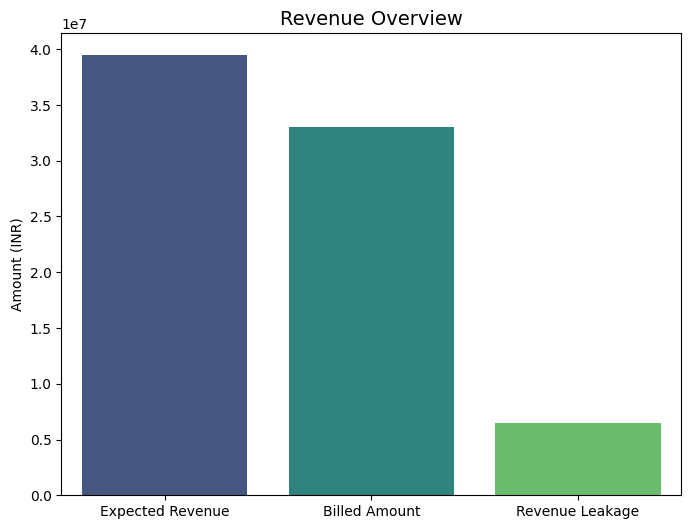

In [10]:
plt.figure(figsize=(8, 6))
revenue_data = {
    'Expected Revenue': df['expected_revenue'].sum(),
    'Billed Amount': df['billed_amount'].sum(),
    'Revenue Leakage': df['revenue_leakage'].sum()
}
sns.barplot(x=list(revenue_data.keys()), y=list(revenue_data.values()), palette='viridis')
plt.title("Revenue Overview", fontsize=14)
plt.ylabel("Amount (INR)")
plt.show()

Visual 2: Billing Efficiency Distribution

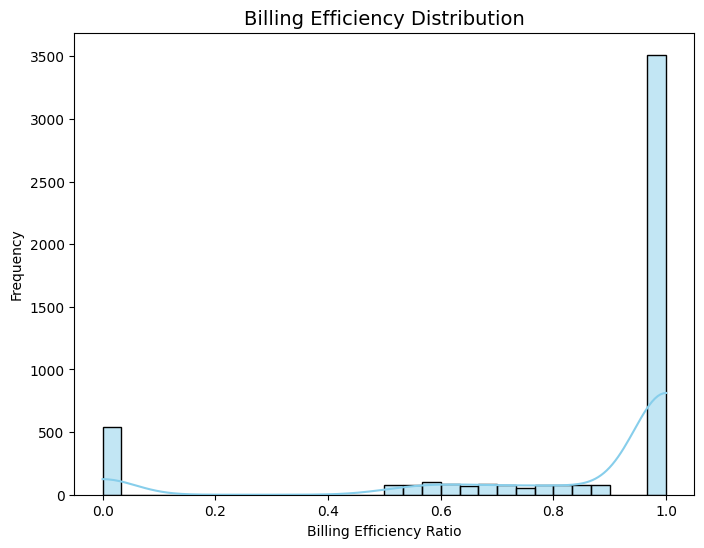

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['billing_efficiency'], bins=30, kde=True, color='skyblue')
plt.title("Billing Efficiency Distribution", fontsize=14)
plt.xlabel("Billing Efficiency Ratio")
plt.ylabel("Frequency")
plt.show()

Visual 3: Churn Rate Pie Chart

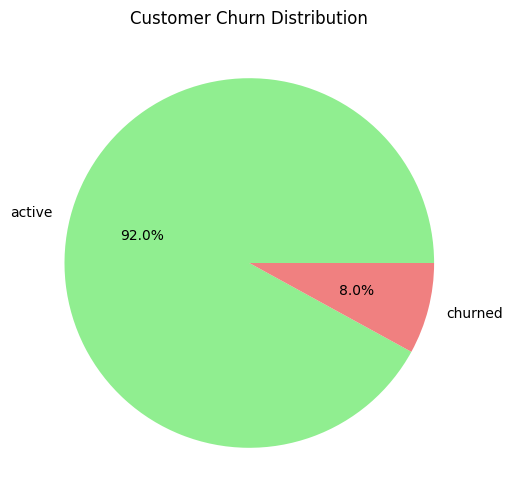

In [12]:
plt.figure(figsize=(6, 6))
churn_counts = df['status'].str.lower().value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Customer Churn Distribution")
plt.show()


Visual 4: Discount Leakage Distribution

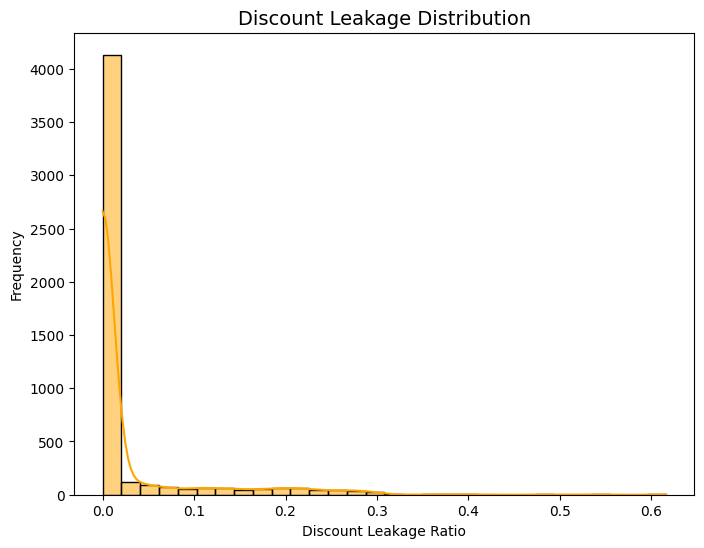

In [13]:
if 'discount_leakage' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['discount_leakage'], bins=30, kde=True, color='orange')
    plt.title("Discount Leakage Distribution", fontsize=14)
    plt.xlabel("Discount Leakage Ratio")
    plt.ylabel("Frequency")
    plt.show()

##### Disgnostics Table

In [14]:
kpis = {
    'Total Expected Revenue': df['expected_revenue'].sum(),
    'Total Billed Amount': df['billed_amount'].sum(),
    'Total Revenue Leakage': df['revenue_leakage'].sum(),
    'Average Billing Efficiency': df['billing_efficiency'].mean(),
    'Churn Rate': churn_rate,
    'Count of Discounted Customers': discount_count,
    'Total Discount Leakage Amount': total_discount_amount
}

In [15]:
#Creating a Diagnostic Table Data Frame
kpi_df = pd.DataFrame(kpis, index=['KPI Value'])

In [16]:
#Display the Diagnostic Table
print(kpi_df)

           Total Expected Revenue  Total Billed Amount  Total Revenue Leakage  \
KPI Value                39453600             33015058                6438542   

           Average Billing Efficiency  Churn Rate  \
KPI Value                    0.834481      0.0798   

           Count of Discounted Customers  Total Discount Leakage Amount  
KPI Value                            925                      785175.17  
